In [15]:
from ballet.validation.entropy import *
from ballet.util import asarray2d
from ballet.feature import make_mapper
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pathlib
from importlib 

In [16]:
def load_data():
    """Loads the Ames Housing dataset

    Source::

        Decock, Dean. "Ames, Iowa: Alternative to the Boston Housing Data as an
        End of Semester Regression Project."
        <https://ww2.amstat.org/publications/jse/v19n3/decock.pdf>
        <https://s3.amazonaws.com/mit-dai-ballet/ames/DataDocumentation.txt >
    """
    source = 'https://s3.amazonaws.com/mit-dai-ballet/ames/AmesHousing.txt'
    df = pd.read_csv(source, sep='\t')
    X_df = df.drop('SalePrice', axis=1)
    y_df = df['SalePrice']

    return X_df, asarray2d(y_df)

X, y = load_data()

In [26]:
def get_all_features():
    features = []
    user_num = 1
    while pathlib.Path('features/user_{:0>2d}'.format(user_num)).exists():
        print("COLLECTING FEATURES FROM USER {:0>2d}".format(user_num))
        user_features = []
        feature_num = 1
        while pathlib.Path('features/user_{:0>2d}/feature_{:0>2d}.py'.format(user_num, feature_num)).exists():
            try:
                module = 'features.user_{:0>2d}.feature_{:0>2d}'.format(user_num, feature_num)
                _temp = __import__(module, globals(), locals(), ['feature'])
                reload(_temp)
                user_features.append(_temp.feature)
            except Exception:
                print('Failed on feature {:0>2d}.{:0>2d}'.format(user_num, feature_num))
            feature_num += 1
        print("FOUND {} FEATURES".format(len(user_features)))
        features.append(user_features)
        user_num += 1

def get_col_from_feature(feature):
    try:
        feature_col = feature.as_dataframe_mapper().fit_transform(X,y)
        return feature_col
    except:
        return np.zeros(y.shape)


def get_feature_cols(all_features):
    feature_cols = list(map(lambda row: list(map(get_col_from_feature, row)), all_features))
    return feature_cols

def get_feature_scores(feature_cols):
    srcs = []
    for row in feature_cols:
        r_s = []
        for f in row:
            try:
                r_s.append(estimate_mutual_information(f,y))
            except:
                r_s.append(0)
        srcs.append(r_s)
    return srcs

In [27]:
all_features = get_all_features()
feature_cols = get_feature_cols(all_features)
feature_scrs = get_feature_scores(feature_cols)


COLLECTING FEATURES FROM USER 01
Failed on feature 01.01
Failed on feature 01.02
Failed on feature 01.03
Failed on feature 01.04
Failed on feature 01.05
Failed on feature 01.06
Failed on feature 01.07
Failed on feature 01.08
Failed on feature 01.09
Failed on feature 01.10
Failed on feature 01.11
Failed on feature 01.12
Failed on feature 01.13
Failed on feature 01.14
Failed on feature 01.15
Failed on feature 01.16
Failed on feature 01.17
Failed on feature 01.18
Failed on feature 01.19
Failed on feature 01.20
Failed on feature 01.21
Failed on feature 01.22
Failed on feature 01.23
Failed on feature 01.24
Failed on feature 01.25
Failed on feature 01.26
Failed on feature 01.27
Failed on feature 01.28
Failed on feature 01.29
Failed on feature 01.30
Failed on feature 01.31
Failed on feature 01.32
Failed on feature 01.33
Failed on feature 01.34
Failed on feature 01.35
Failed on feature 01.36
Failed on feature 01.37
Failed on feature 01.38
Failed on feature 01.39
Failed on feature 01.40
Failed 

TypeError: 'NoneType' object is not iterable

In [40]:
feature_scrs += 1.5

In [44]:


g = nx.Graph()
node_indices = [(i,j) for j in range(1,6) for i in range(1,10)]
for idx in node_indices:
    g.add_node(idx)

In [ ]:
for idx_1 in range(len(node_indices)):
    for idx_2 in range(idx_1 + 1, len(node_indices)):
        n_1 = node_indices[idx_1]
        n_2 = node_indices[idx_2]
        col_1 = asarray2d(feature_cols[n_1[0] - 1][n_1[1] - 1])
        col_2 = asarray2d(feature_cols[n_2[0] - 1][n_2[1] - 1])
        try:
            info_score = estimate_mutual_information(col_1, col_2)
        except:
            info_score = 0
        g.add_edge(n_1,n_2, weight=info_score)

In [53]:
for idx_1 in range(len(node_indices)):
    most_r = ()
    best_r = 0
    for idx_2 in range(len(node_indices)):
        if idx_1 == idx_2:
            continue
        n_1 = node_indices[idx_1]
        n_2 = node_indices[idx_2]
        col_1 = asarray2d(feature_cols[n_1[0] - 1][n_1[1] - 1])
        col_2 = asarray2d(feature_cols[n_2[0] - 1][n_2[1] - 1])
        try:
            info_score = estimate_mutual_information(col_1, col_2)
        except:
            info_score = 0
        if info_score > best_r:
            best_r = info_score
            most_r = n_2
    if most_r is not ():
        g.add_edge(node_indices[idx_1], most_r, weight=1/(.1 + best_r))

In [52]:
print(g.edges)

[((1, 1), (8, 2)), ((2, 1), (4, 1)), ((3, 1), (5, 3)), ((4, 1), (3, 4)), ((4, 1), (7, 1)), ((4, 1), (8, 1)), ((4, 1), (9, 1)), ((4, 1), (2, 2)), ((4, 1), (4, 2)), ((4, 1), (5, 2)), ((4, 1), (7, 2)), ((4, 1), (9, 2)), ((4, 1), (1, 3)), ((4, 1), (2, 3)), ((4, 1), (3, 3)), ((4, 1), (4, 3)), ((4, 1), (6, 3)), ((4, 1), (7, 3)), ((4, 1), (9, 3)), ((4, 1), (2, 4)), ((4, 1), (6, 4)), ((4, 1), (7, 4)), ((4, 1), (8, 4)), ((4, 1), (9, 4)), ((4, 1), (1, 5)), ((4, 1), (2, 5)), ((4, 1), (3, 5)), ((4, 1), (4, 5)), ((4, 1), (5, 5)), ((4, 1), (6, 5)), ((5, 1), (1, 4)), ((6, 1), (1, 2)), ((7, 1), (7, 5)), ((3, 2), ()), ((6, 2), ()), ((7, 2), (9, 5)), ((8, 2), (5, 4)), ((3, 3), (4, 4)), ((8, 3), (8, 4)), ((8, 5), ())]


{(1, 1): array([-0.89803667, -0.29452617]), (2, 1): array([ 0.1178108 ,  0.15314901]), (3, 1): array([ 0.90226193, -0.02407894]), (4, 1): array([ 0.09723475,  0.02880133]), (5, 1): array([-0.77384511,  0.51573421]), (6, 1): array([-0.56252241, -0.33654173]), (7, 1): array([ 0.39302952,  0.00796854]), (8, 1): array([ 0.31480227, -0.11490149]), (9, 1): array([ 0.10648274,  0.09171185]), (1, 2): array([-0.58837514, -0.3366634 ]), (2, 2): array([ 0.02084292,  0.17090933]), (3, 2): array([-0.84832896,  0.05412353]), (4, 2): array([ 0.26935239,  0.14142426]), (5, 2): array([ 0.15256389, -0.03423874]), (6, 2): array([ 0.31358639, -0.99329107]), (7, 2): array([-0.02993963, -0.06008099]), (8, 2): array([-0.93133205, -0.4104835 ]), (9, 2): array([-0.00681981,  0.08460249]), (1, 3): array([ 0.09885301, -0.01370708]), (2, 3): array([-0.11457573,  0.08603296]), (3, 3): array([ 0.005237  , -0.23664154]), (4, 3): array([ 0.1432746 , -0.10480708]), (5, 3): array([ 1.        , -0.03146091]), (6, 3): ar

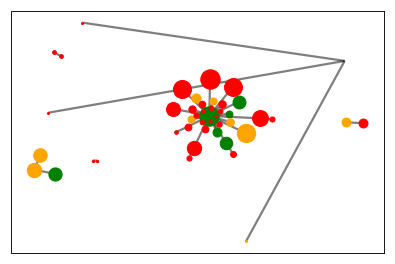

In [89]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

accepted_features = [(4,1), (4,2), (4,3), (5,4), (5,5), (8,4)]
pruned_features = [(1,1), (3,1), (2,1), (2,2), (8,1), (6,2), (9,3), (8,2), (6,4)]
rejected_features = list(filter(lambda x: x not in accepted_features and x not in pruned_features, node_indices))

t = g
pos = nx.spring_layout(t)
for node in accepted_features:
    nx.draw_networkx_nodes(t, pos,
                           nodelist=[node],
                           node_color='g',
                           node_size=feature_scrs[node[0] - 1][node[1] -1] * 2,
                           alpha=1)
for node in pruned_features:
    nx.draw_networkx_nodes(t, pos,
                           nodelist=[node],
                           node_color='orange',
                           node_size=feature_scrs[node[0] - 1][node[1] -1] * 2,
                           alpha=1)
for node in rejected_features:
    nx.draw_networkx_nodes(t, pos,
                           nodelist=[node],
                           node_color='r',
                           node_size=feature_scrs[node[0] - 1][node[1] -1] * 2,
                           alpha=1)

nx.draw_networkx_edges(t, pos, width=2.0, alpha=0.5)
# nx.draw_networkx_labels(t, pos, node_indices, font_size=16)
print(pos)

In [141]:
features = []
for row in all_features:
    features = features + row


In [142]:
full_accept_df = make_mapper(features).fit_transform(X,y)
reg_all = LinearRegression().fit(full_accept_df, y).score(full_accept_df, y)
print(reg_all)
print(reg)


Exception: ['Enclosed Porch', '3Ssn Porch', 'Open Porch SF']: Data must be 1-dimensional

In [94]:
pruned = [
    [(8,1), (1,1), (3,1)],
    [(4,2), (2,2), (2,1)],
    [(6,2), (8,1)],
    [(4,3), (6,2)],
    [(5,4), (9,3), (8,2)],
    [(8,4), (6,4)],
]

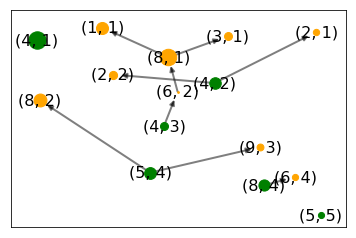

In [135]:
accepted_features = [(4,1), (4,2), (4,3), (5,4), (5,5), (8,4)]
pruned_features = [(1,1), (3,1), (2,1), (2,2), (8,1), (6,2), (9,3), (8,2), (6,4)]

d = nx.DiGraph()
for f in accepted_features:
    d.add_node(f)
for f in pruned_features:
    d.add_node(f)

for prune in pruned:
    pruner_f = prune[0]
    for pruned_f in prune[1:]:
        d.add_edge(pruner_f, pruned_f)

# pos = nx.spring_layout(g)
# for node in g.nodes():
#     pos[node][1] = -(node[1] * 10 + node[0] - 30) / 30
for node in accepted_features:
    nx.draw_networkx_nodes(d, pos,
                           nodelist=[node],
                           node_color='g',
                           node_size=feature_scrs[node[0] - 1][node[1] -1] * 2,
                           alpha=1)
for node in pruned_features:
    nx.draw_networkx_nodes(d, pos,
                           nodelist=[node],
                           node_color='orange',
                           node_size=feature_scrs[node[0] - 1][node[1] -1] * 2,
                           alpha=1)
nx.draw_networkx_edges(d, pos, width=2.0, alpha=0.5)
nx.draw_networkx_labels(d, pos, font_size=16)
plt.show()